In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
import seaborn as sns

In [5]:
df = sns.load_dataset('iris')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
# applying label encode to change the species to numerical data
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df['species'].unique()

array([0, 1, 2])

In [11]:
#reducing the dimension of dataset , not necessary but for plotting purpose only
df = df[["sepal_length","petal_length", "species"]]

In [12]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [15]:
X = df.iloc[: , 0:2]
y = df.iloc[:, -1]


In [16]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [17]:
lgr = LogisticRegression( multi_class="multinomial")

In [18]:
lgr.fit(X_train,y_train)

D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [19]:
y_pred= lgr.predict(X_test)

In [20]:
#score
accuracy_score(y_test,y_pred)

0.9666666666666667

In [22]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [23]:
#prediction
data = np.array([[3.4,2.7]])

In [24]:
# probablity of all three 0,1,2 
lgr.predict_proba(data)

D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [25]:
#predicting result that have high probablity
lgr.predict(data)

D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


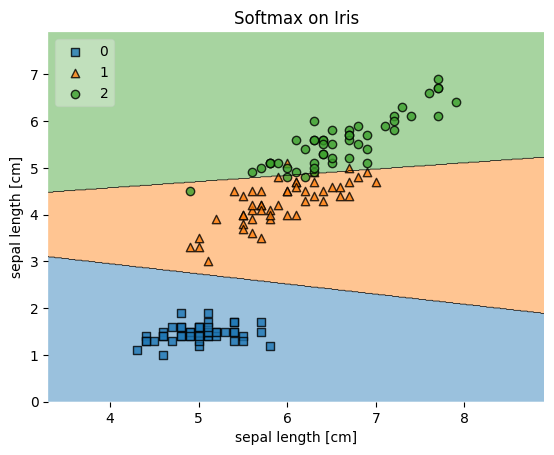

In [28]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, lgr, legend= 2)

plt.xlabel("sepal length [cm]")
plt.ylabel("sepal length [cm]")
plt.title("Softmax on Iris")

plt.show()